In [1]:
#importation des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:

pd.set_option('display.max_row', 30)
pd.set_option('display.max_column', 30)

In [3]:
#importation du dataset depuis la base de données:
url = 'https://simplonline-v3-prod.s3.eu-west-3.amazonaws.com/media/file/csv/87e3ec06-a99f-42bf-b292-074d02f31a94.csv'
df = pd.read_csv(url, index_col=0,sep='\t',encoding = "utf-8")

In [4]:
#visualisation des premières lignes du dataset
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [5]:
#visualisation des du noms colones de notre Dataset
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
# Dimension du dataset
df.shape

(2240, 28)

In [7]:
#Visualisation des information sur les variables du dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null 

In [8]:
#sauvegarde du dataset en créeant une autre copie
df1=df.copy()

In [9]:
#Visualisation détaillée des valeurs manquantes pour chaque variables
a=df1.isna().sum()
for i in range(len(a.index)):
    print(a.index[i],"===>      ",a[i])

Year_Birth ===>       0
Education ===>       0
Marital_Status ===>       0
Income ===>       24
Kidhome ===>       0
Teenhome ===>       0
Dt_Customer ===>       0
Recency ===>       0
MntWines ===>       0
MntFruits ===>       0
MntMeatProducts ===>       0
MntFishProducts ===>       0
MntSweetProducts ===>       0
MntGoldProds ===>       0
NumDealsPurchases ===>       0
NumWebPurchases ===>       0
NumCatalogPurchases ===>       0
NumStorePurchases ===>       0
NumWebVisitsMonth ===>       0
AcceptedCmp3 ===>       0
AcceptedCmp4 ===>       0
AcceptedCmp5 ===>       0
AcceptedCmp1 ===>       0
AcceptedCmp2 ===>       0
Complain ===>       0
Z_CostContact ===>       0
Z_Revenue ===>       0
Response ===>       0


### Analyse Exploratoire du Jeu  de Données

## Objectif :
- Comprendre les différengts segment de client existant dans notre base
- Développer une premiere stratégie de modélisation 

## Analyse de base de donnée
#### Analyse de Forme :
- **variable target** : Reponse
- **lignes et colonnes** : 2240, 28
- **types de variables** : qualitatives : 4, quantitatives : 24
- **Analyse des valeurs manquantes** :
    - On constate la variables "Income" <==> "Revenu" avec 24 valeurs manquantes environ 1,07% de la variable.

#### Analyse de Fond :
- **Visualisation de la target** :

    Nous sommes dans un cas de segmentation clients, toute les variables peuvent servir au decoupage des différents clusters.
    
    
    
- **Signification des variables** :


    Description du jeu de données : 
    
    ID : Identifiant unique du client
    Year_Birth : année de naissance du client
    Education : niveau d'éducation du client
    Marital_Status : état civil du client
    Revenu <==> Income : Revenu annuel du ménage du client
    Kidhome : nombre d'enfants dans le ménage du client
    Teenhome : Nombre d'adolescents dans le ménage du client
    Dt_Customer : Date d'inscription du client auprès de l'entreprise
    Récence <==> Recency : nombre de jours depuis le dernier achat du client
    Plainte <==> complain : 1 si le client s'est plaint au cours des 2 dernières années, 0 sinon


    MntWines : Montant dépensé pour le vin au cours des 2 dernières années
    MntFruits : Montant dépensé en fruits au cours des 2 dernières années
    MntMeatProducts : montant dépensé pour la viande au cours des 2 dernières années
    MntFishProducts : montant dépensé pour le poisson au cours des 2 dernières années
    MntSweetProducts : montant dépensé en sucreries au cours des 2 dernières années
    MntGoldProds : Montant dépensé en or au cours des 2 dernières années


    NumDealsPurchases : nombre d'achats c avec une remise
    AcceptedCmp1 : 1 si le client a accepté l'offre lors de la 1ère campagne, 0 sinon
    AcceptedCmp2 : 1 si le client a accepté l'offre lors de la 2ème campagne, 0 sinon
    AcceptedCmp3 : 1 si le client a accepté l'offre dans la 3ème campagne, 0 sinon
    AcceptedCmp4 : 1 si le client a accepté l'offre lors de la 4ème campagne, 0 sinon
    AcceptedCmp5 : 1 si le client a accepté l'offre lors de la 5ème campagne, 0 sinon
    Réponse : 1 si le client a accepté l'offre lors de la dernière campagne, 0 sinon


    NumWebPurchases : nombre d'achats accepté sur le site Web de l'entreprise
    NumCatalogPurchases : Nombre d'achats accepté à  l'aide d'un catalogue
    NumStorePurchases : Nombre d'achats accepté directement en magasin
    NumWebVisitsMonth : nombre de visites sur le site Web de l'entreprise au cours du dernier mois



In [10]:
#Supression des valeurs manquantes selon les lignes de notre dataset
df1.dropna(axis=0,  inplace=True)

In [11]:
#Visualisation détaillée des valeurs manquantes pour chaque variables
a=df1.isna().sum()
for i in range(len(a.index)):
    print(a.index[i],"===>      ",a[i])

Year_Birth ===>       0
Education ===>       0
Marital_Status ===>       0
Income ===>       0
Kidhome ===>       0
Teenhome ===>       0
Dt_Customer ===>       0
Recency ===>       0
MntWines ===>       0
MntFruits ===>       0
MntMeatProducts ===>       0
MntFishProducts ===>       0
MntSweetProducts ===>       0
MntGoldProds ===>       0
NumDealsPurchases ===>       0
NumWebPurchases ===>       0
NumCatalogPurchases ===>       0
NumStorePurchases ===>       0
NumWebVisitsMonth ===>       0
AcceptedCmp3 ===>       0
AcceptedCmp4 ===>       0
AcceptedCmp5 ===>       0
AcceptedCmp1 ===>       0
AcceptedCmp2 ===>       0
Complain ===>       0
Z_CostContact ===>       0
Z_Revenue ===>       0
Response ===>       0


###### Visualisation de la repartition des réponses clients dans la variable "Response"

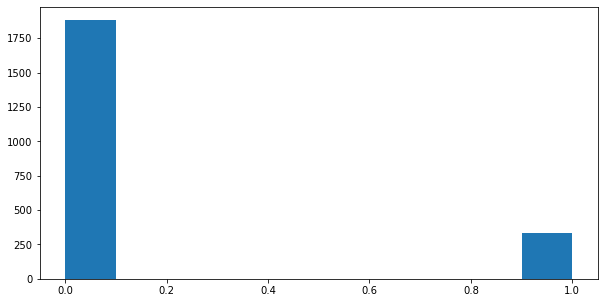

In [12]:
plt.figure( figsize=(10,5))
plt.hist(df1['Response']);

In [13]:
#visualisation de des données sur la variable Reponse
df1['Response'].value_counts()

0    1883
1     333
Name: Response, dtype: int64

       On observe un taux élevé de reponse négative au précédentes offres qui peuvent être dû a des facteurs angogènes ou un mauvais ciblage client.
       
       Le travail a venir s'interessera a la compréhension des facteurs induisants ces refus d'offres et une segmentation client. 

### Analyse Approfondi du Dataset

In [14]:
df1

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0


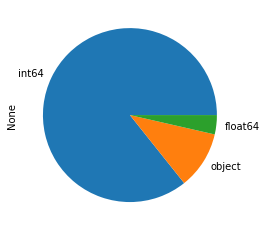

In [15]:
#Visualisation des proportion des différents types de variables au sein de notre dataset
df1.dtypes.value_counts().plot.pie();

     On constate des données quantitative a plus de 80% dans notre jeu de données, ceci nous indique sur les techniques pour l'approfondissement de l'EDA

In [16]:
#Creation du dataframe des valeurs Qualitatives
df1_quali=df1.select_dtypes('object')
df1_quali

,Education,Marital_Status,Dt_Customer
ID,,,
5524,Graduation,Single,04-09-2012
2174,Graduation,Single,08-03-2014
4141,Graduation,Together,21-08-2013
6182,Graduation,Together,10-02-2014
5324,PhD,Married,19-01-2014
...,...,...,...
10870,Graduation,Married,13-06-2013
4001,PhD,Together,10-06-2014
7270,Graduation,Divorced,25-01-2014


In [17]:
#Creation du dataframe des valeurs Quantitatives
df1_quanti=df1.select_dtypes(include=['float64','int64'])
df1_quanti

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
2174,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
4141,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
6182,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
5324,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,1967,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
4001,1946,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
7270,1981,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0


##### EDA variables Qualitatives

In [18]:
#visualisation des données sur les variable qualitatives - Education ou niveau d'études des client
df1_quali['Education'].value_counts()


Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

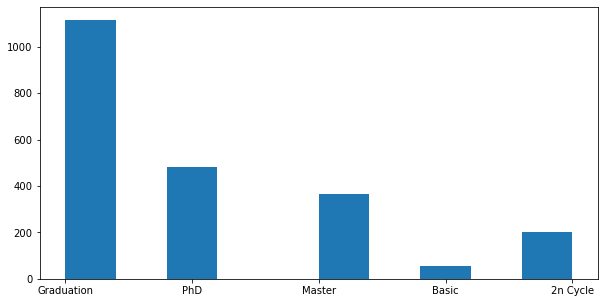

In [19]:
plt.figure( figsize=(10,5))
plt.hist(df1_quali['Education']);

        On Observe une forte concentration de client avec le niveau d'étude Graduation, une proportion plus ou moins égal des client ayant un PhD ou Master et une faible proportion de client ayant un niveau basic ou de 2n Cycle

In [20]:
#visualisation des données sur les variable qualitatives - Marital_Status ou Status Matimoniale
df1_quali['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

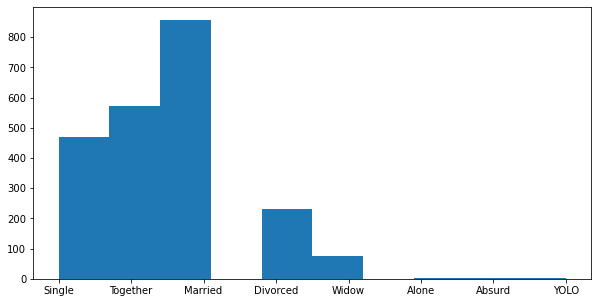

In [21]:
plt.figure( figsize=(10,5))
plt.hist(df1_quali['Marital_Status']);

      On observe une forte concentration de client celibataire, en couple ou Marié et une faible porportion de client Divorcé et ceux vivant en concubinage après le mariage, une proportion quasi null Seul, Absurd, YOLO
      
      Les profils Alone , Absurd, YOLO de la variable Marital_Status ayant une proportion quasi null ( Alone: 3 clients , Absurd: 2 clients, YOLO: clients).Les lignes concernats ces profils seront supprimés du jeu de données. 

In [22]:
df1_quali['Dt_Customer'].value_counts()

31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
22-05-2014    10
              ..
09-06-2013     1
26-04-2014     1
29-01-2014     1
11-06-2014     1
13-01-2014     1
Name: Dt_Customer, Length: 662, dtype: int64

    La variabless 'Dt_Customer' étant un champ date à laquel le client a souscrit a un services, cette date étant  très aléatoire suivant les individus, elle sera retiré du Dataset df1_quali

In [23]:
df1_quali.drop(columns='Dt_Customer',inplace=True)
df1_quali

,Education,Marital_Status
ID,,
5524,Graduation,Single
2174,Graduation,Single
4141,Graduation,Together
6182,Graduation,Together
5324,PhD,Married
...,...,...
10870,Graduation,Married
4001,PhD,Together
7270,Graduation,Divorced


In [24]:
#df1_quali.Marital_Status.drop(labels=['Alone','Absurd','YOLO'], ,inplace=True,axis=0)
#df1_quali

    EDA variables Qualitatives : visualisation des relation entre les variables qualitatives et la target 

##### EDA variables Quantitatives

In [25]:
df1_quanti

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
2174,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
4141,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
6182,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
5324,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,1967,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
4001,1946,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
7270,1981,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0


     Visualisation des variables Z_CostContact et Z_Revenue

In [26]:
df1_quanti['Z_CostContact']

ID
5524     3
2174     3
4141     3
6182     3
5324     3
        ..
10870    3
4001     3
7270     3
8235     3
9405     3
Name: Z_CostContact, Length: 2216, dtype: int64

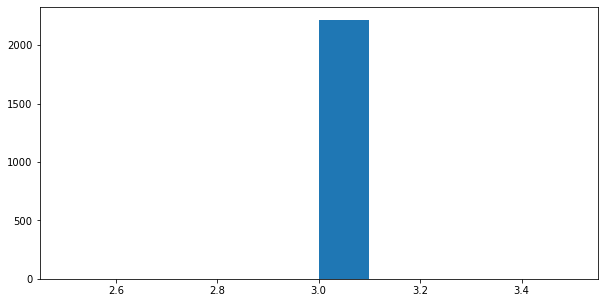

In [27]:
plt.figure( figsize=(10,5))
plt.hist(df1_quanti['Z_CostContact']);

     la variable Z_CostContact possède une seul valeur sur l'ensembles des individus sans aucun descriptif dans les metadata

In [28]:
df1_quanti['Z_Revenue']

ID
5524     11
2174     11
4141     11
6182     11
5324     11
         ..
10870    11
4001     11
7270     11
8235     11
9405     11
Name: Z_Revenue, Length: 2216, dtype: int64

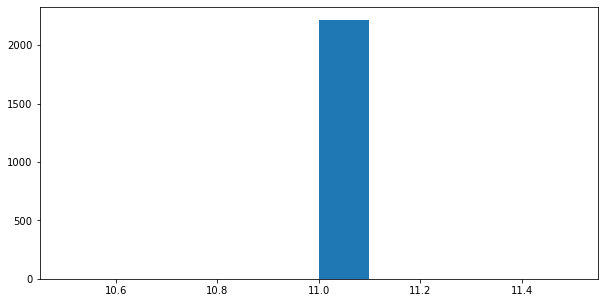

In [29]:
plt.figure( figsize=(10,5))
plt.hist(df1_quanti['Z_Revenue']);

    la variable Z_Revenue possède  également une seul valeur sur l'ensembles des individus sans aucun descriptif dans les metadata

    Les variables Z_CostContact,Z_Revenue aportant la même quantité d'information sur l'ensemble des individus de part et d'autre de chaque variable sans aucune explication dans les métadata seront retiré du jeu de donnée.

In [30]:
#Suppression des variables Z_CostContact','Z_Revenue
df1_quanti.drop(['Z_CostContact','Z_Revenue'],inplace=True,axis=1)
df1_quanti

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
2174,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
4141,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
6182,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
5324,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,1967,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
4001,1946,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
7270,1981,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0


In [31]:
for i in df1_quanti.columns:
    print(df1_quanti[[i]].value_counts())
    print('-'*15)

Year_Birth
1976          89
1971          86
1975          83
1972          78
1978          76
              ..
1899           1
1941           1
1940           1
1900           1
1893           1
Length: 59, dtype: int64
---------------
Income  
7500.0      12
35860.0      4
18929.0      3
18690.0      3
37760.0      3
            ..
42081.0      1
42033.0      1
42021.0      1
42011.0      1
666666.0     1
Length: 1974, dtype: int64
---------------
Kidhome
0          1283
1           887
2            46
dtype: int64
---------------
Teenhome
0           1147
1           1018
2             51
dtype: int64
---------------
Recency
56         37
54         32
30         32
46         31
92         30
           ..
5          15
59         14
22         13
7          12
44         11
Length: 100, dtype: int64
---------------
MntWines
2           42
1           37
5           37
6           37
4           33
            ..
619          1
249          1
615          1
251          1
1493   

In [32]:
#Fonction de convertion de la variable date en Age
def newAge(anne):
    import datetime
    date=datetime.date.today()
    year1 =int(date.strftime("%Y"))
    ag=year1 - anne
    return ag

In [33]:
#Creation d'une colonnes Age
df1_quanti['Age'] = df1_quanti['Year_Birth'].apply(newAge)

In [34]:
df1_quanti

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
ID,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,64
2174,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,67
4141,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,56
6182,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,37
5324,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,1967,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,54
4001,1946,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,75
7270,1981,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,40


In [36]:
#Supression de la colonne Year_Birth etn conservant la colonne Age
df1_quanti.drop(labels=['Year_Birth'], axis=1,inplace=True)
df1_quanti

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
ID,,,,,,,,,,,,,,,,,,,,,,,
5524,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,64
2174,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,67
4141,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,56
6182,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,37
5324,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,54
4001,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,75
7270,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,40


In [48]:
col_qanti = df1_quanti.columns
col_qanti

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age'],
      dtype='object')

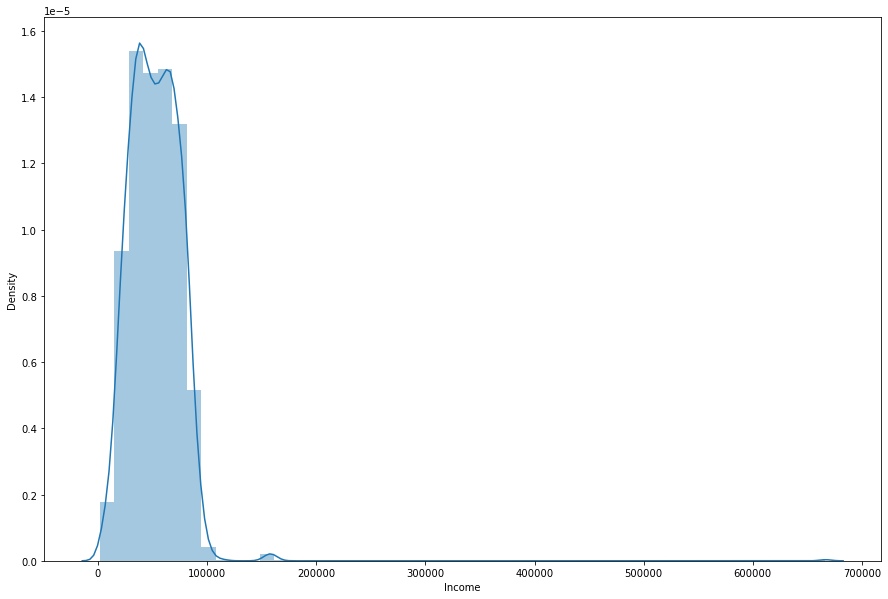

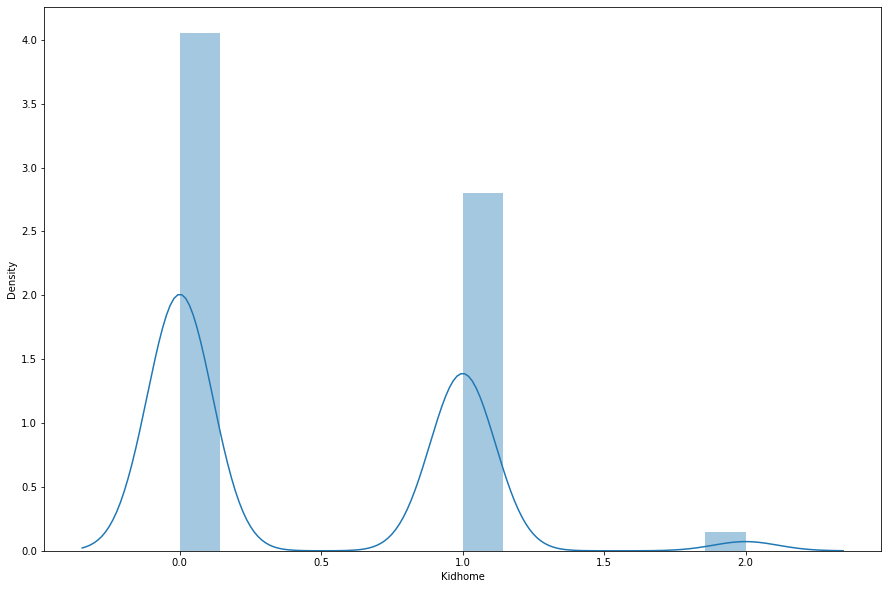

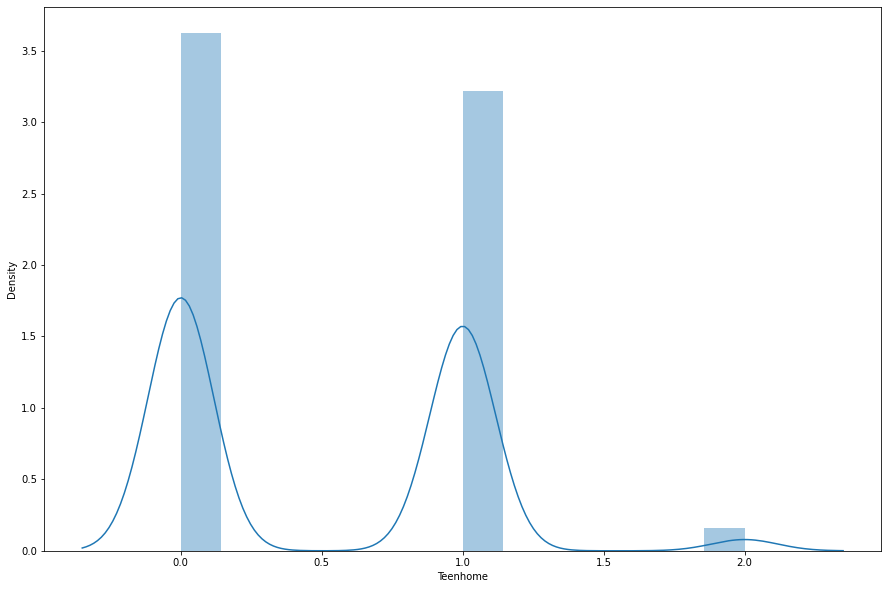

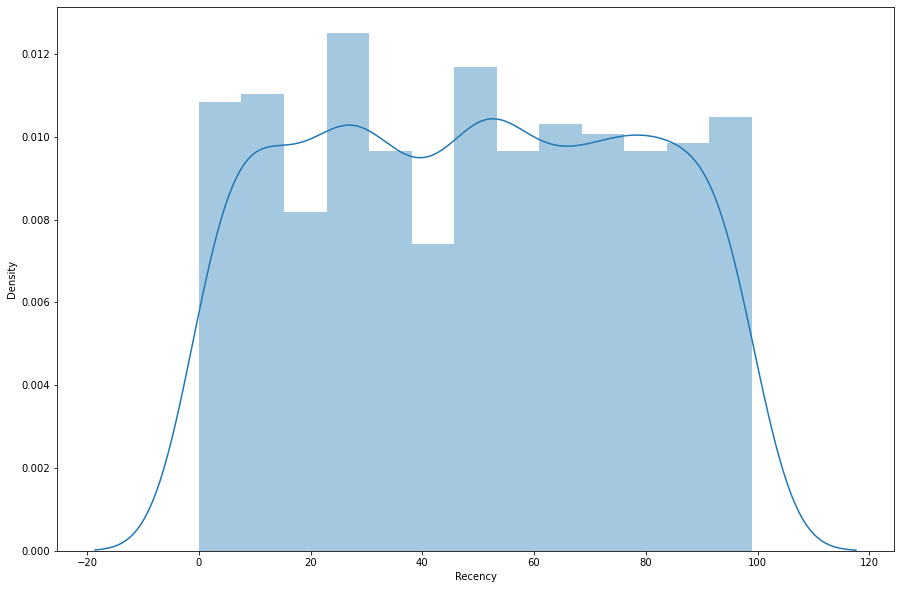

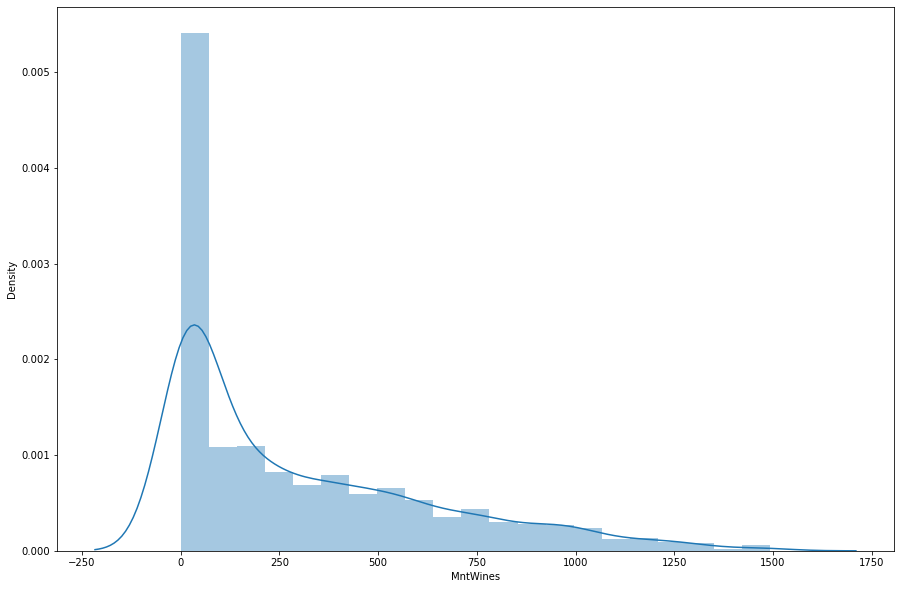

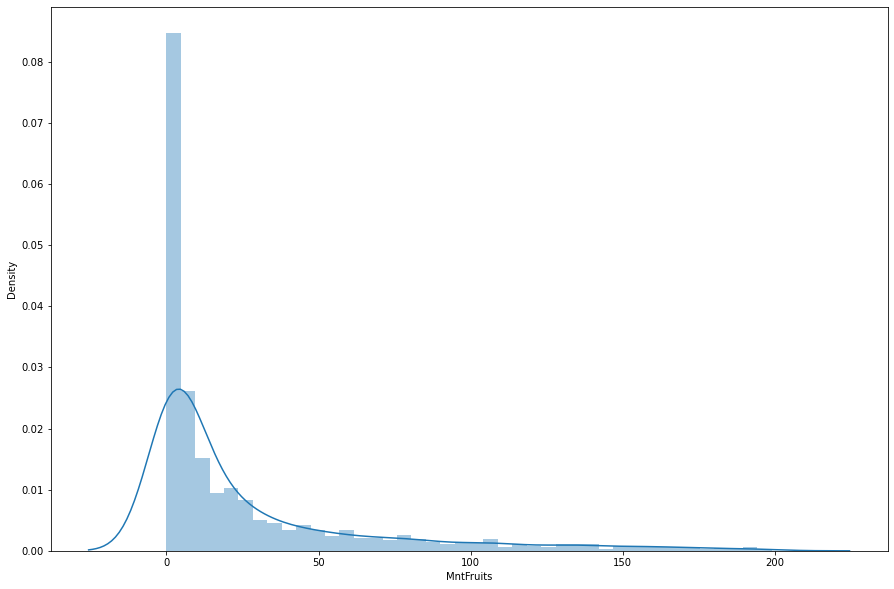

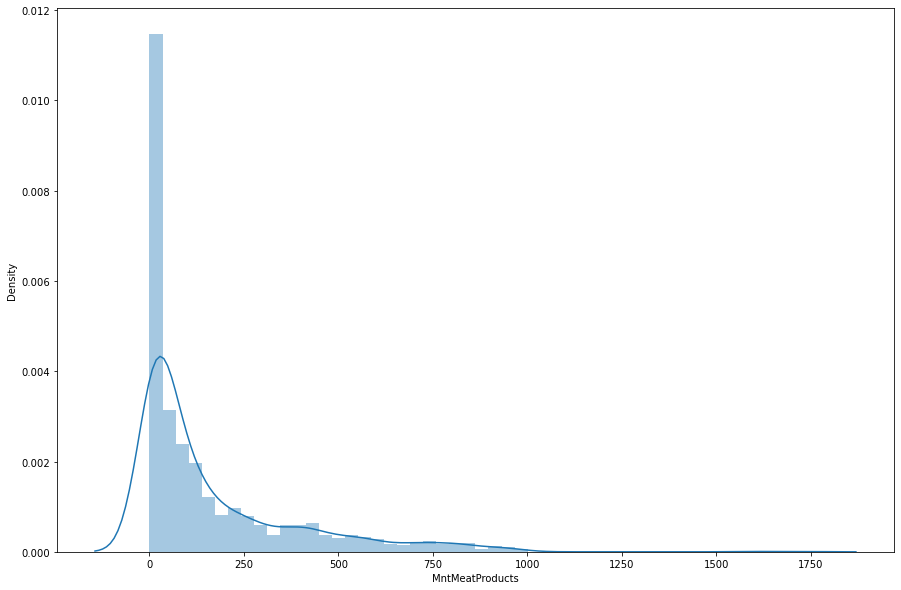

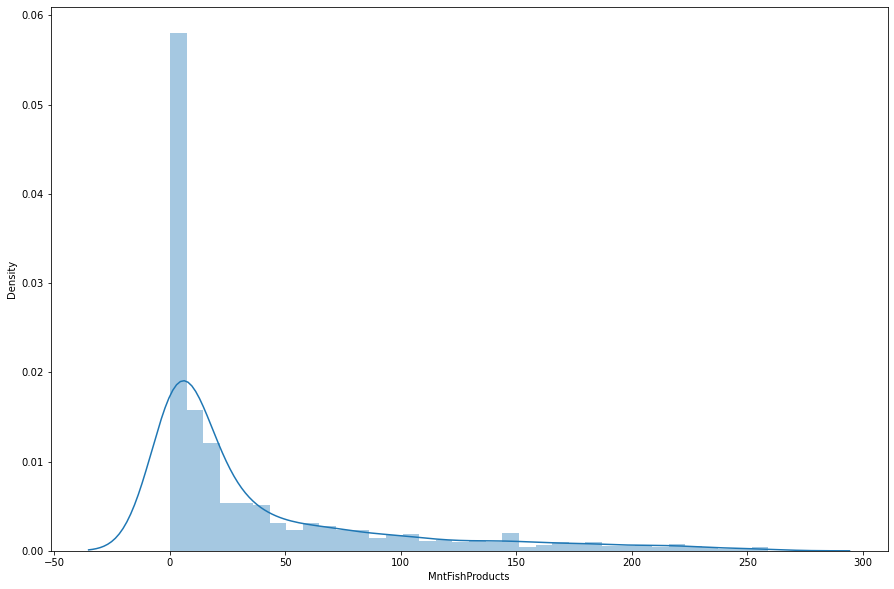

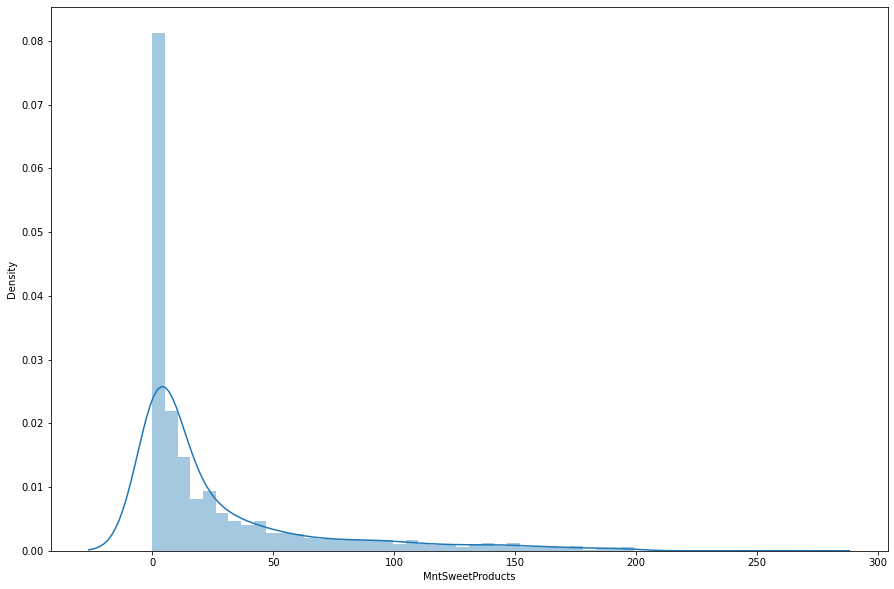

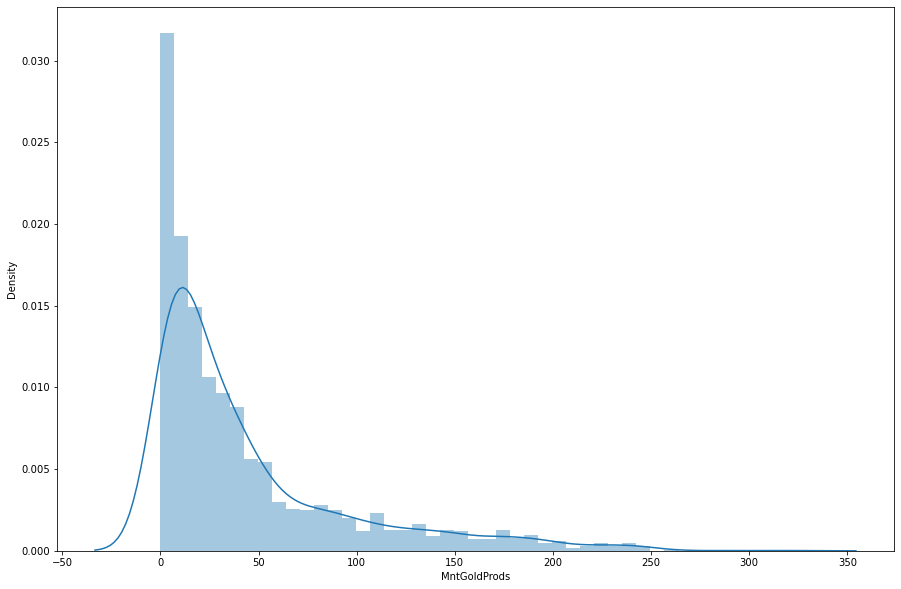

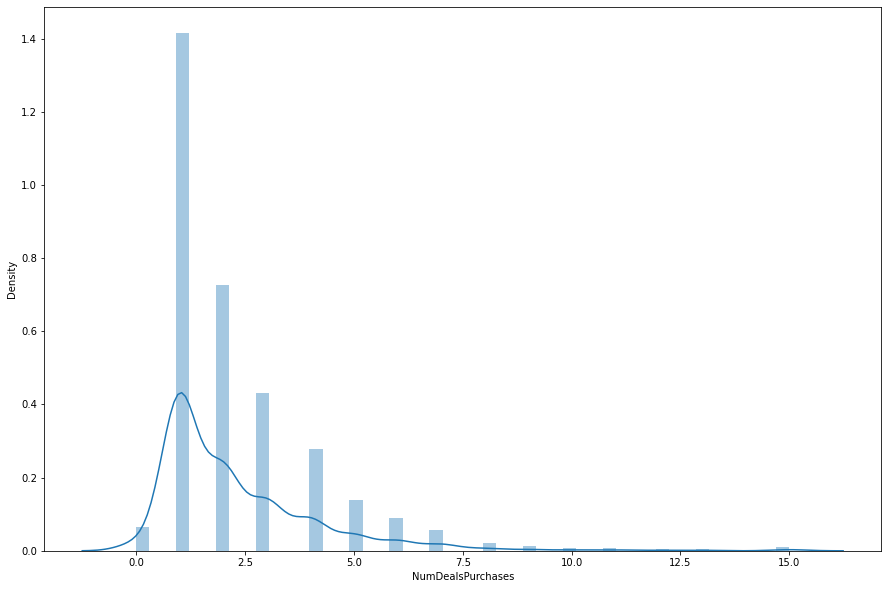

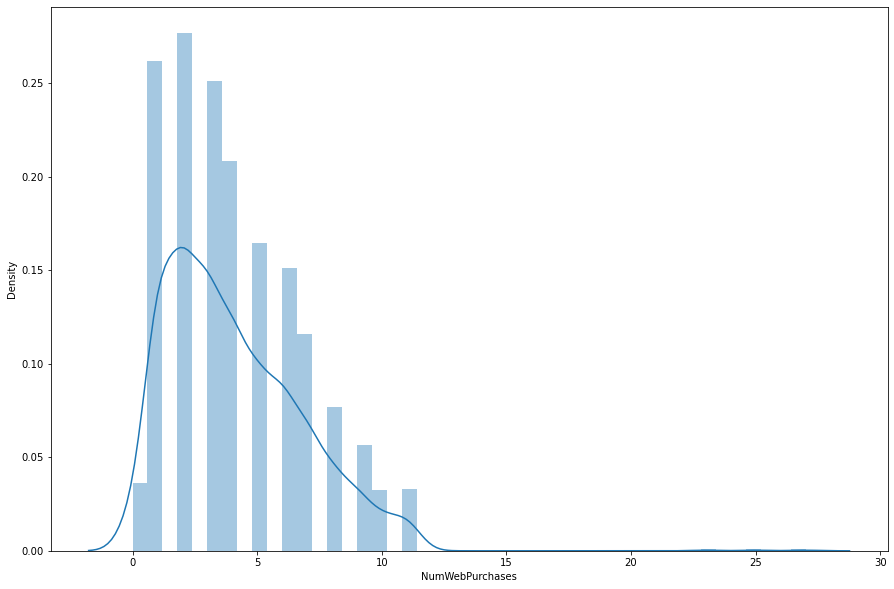

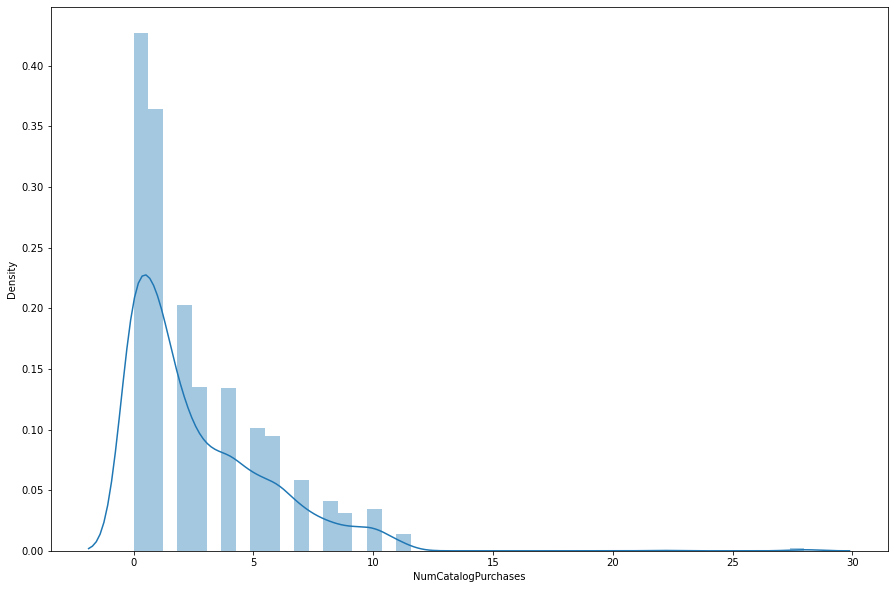

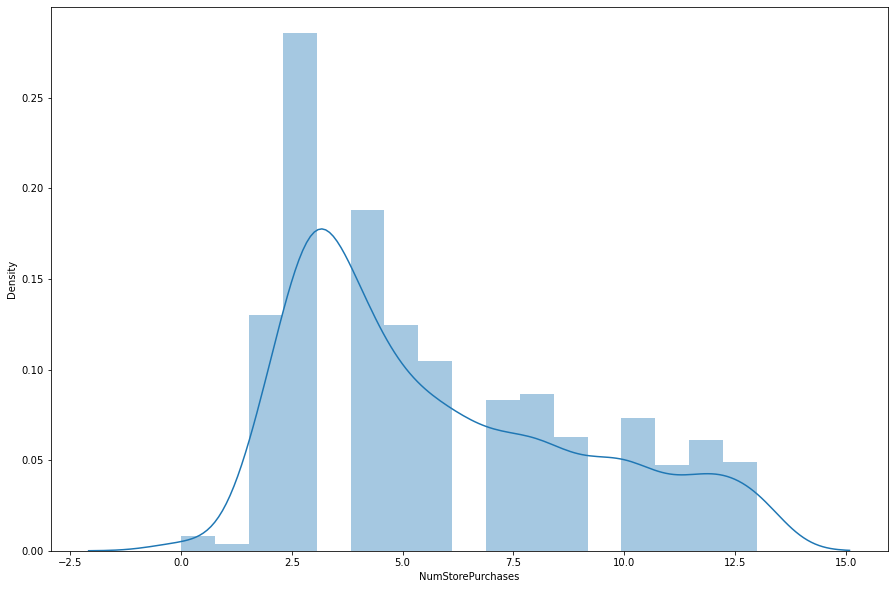

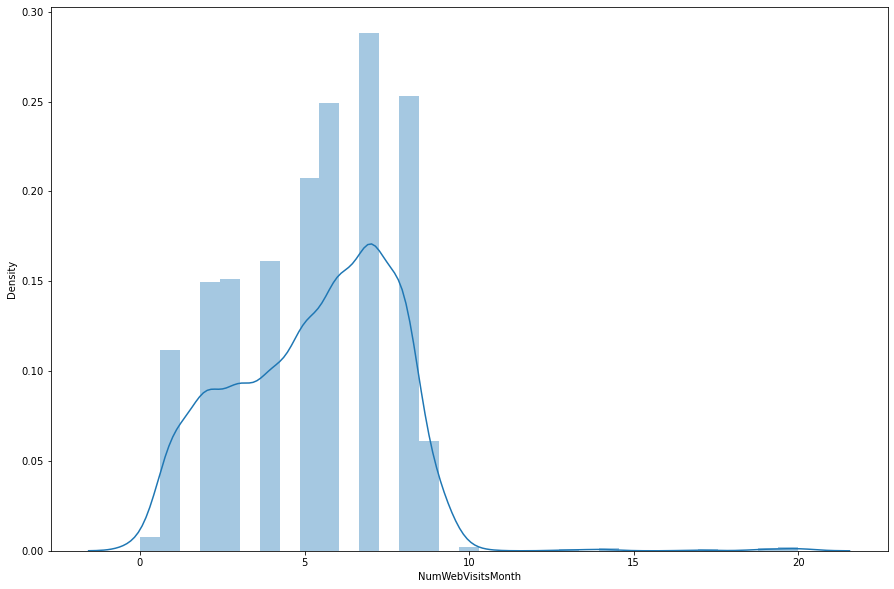

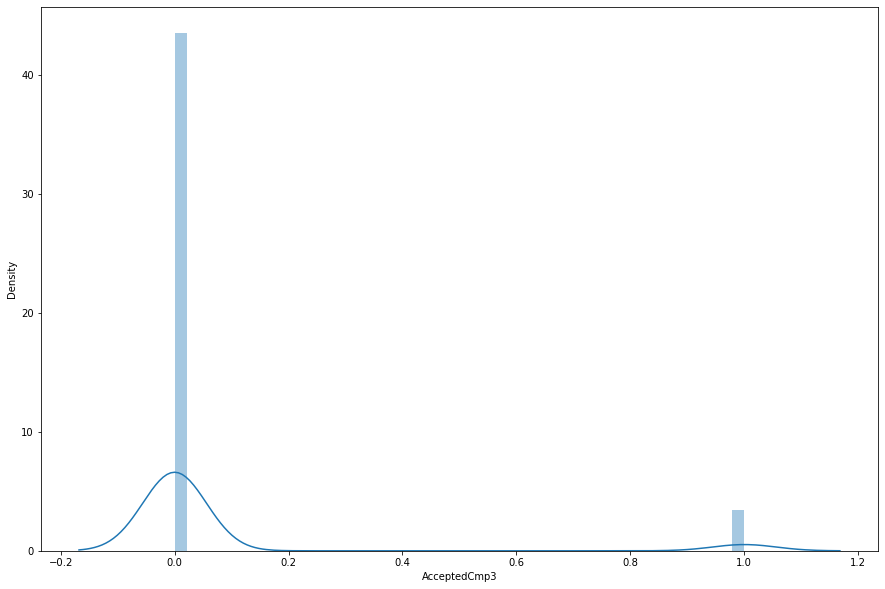

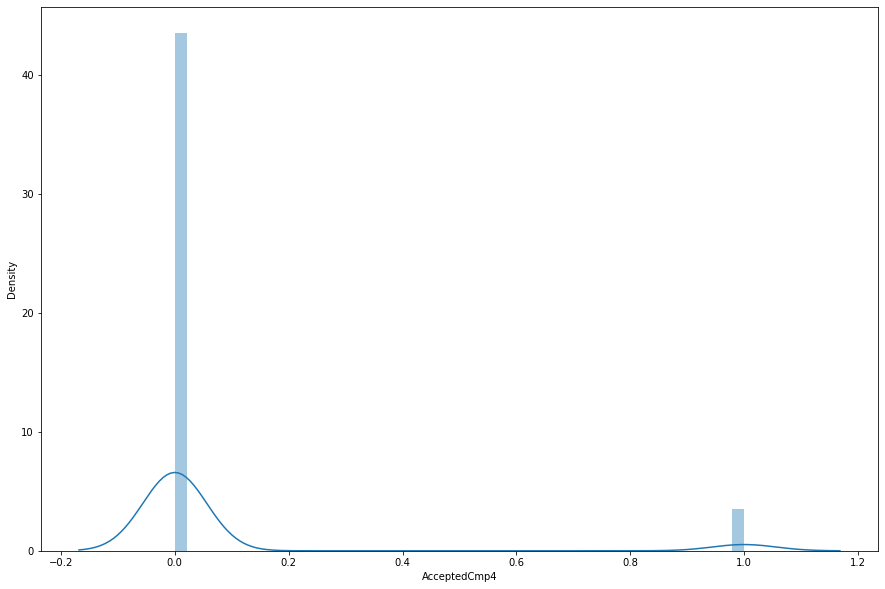

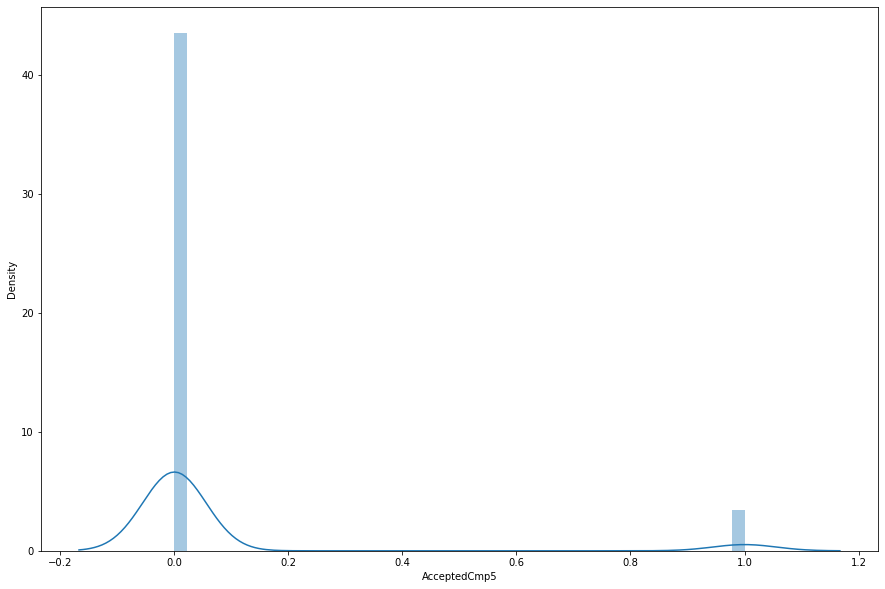

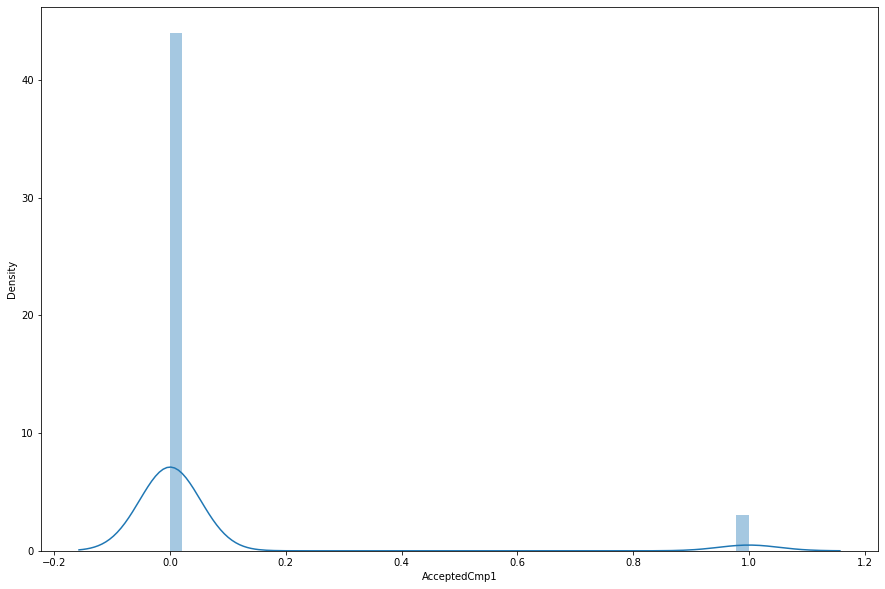

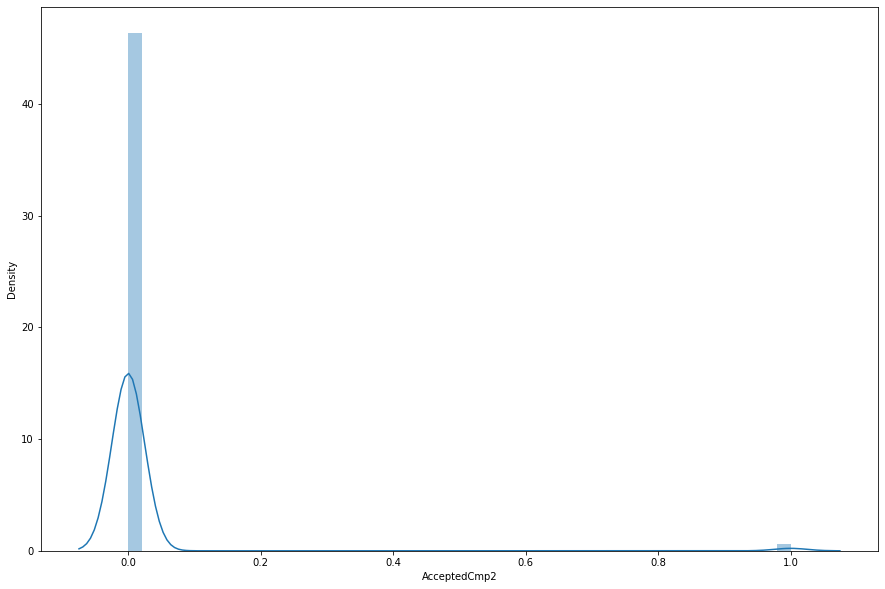

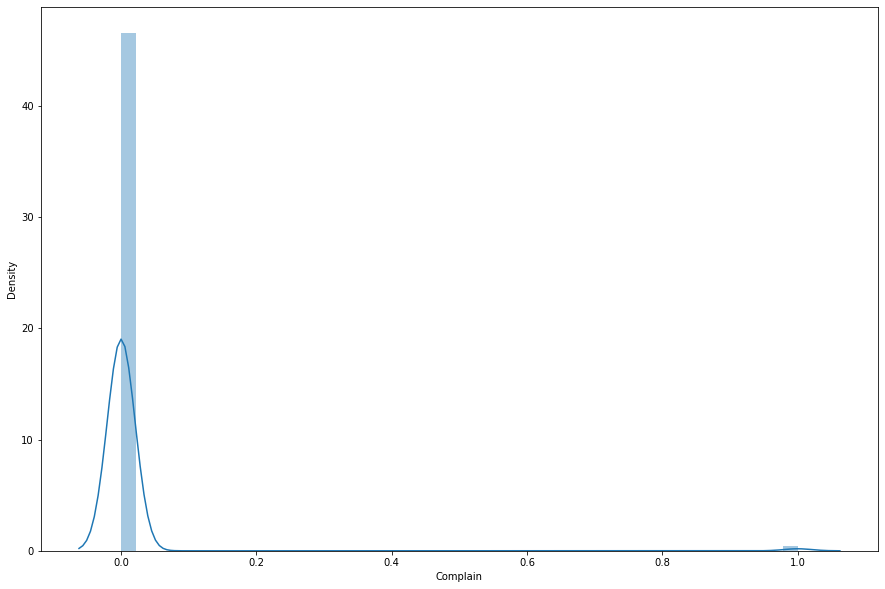

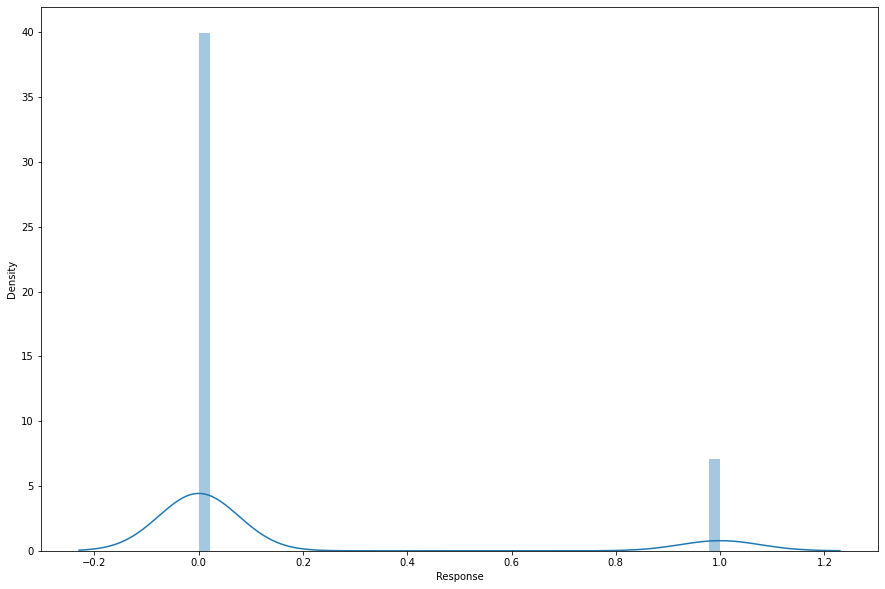

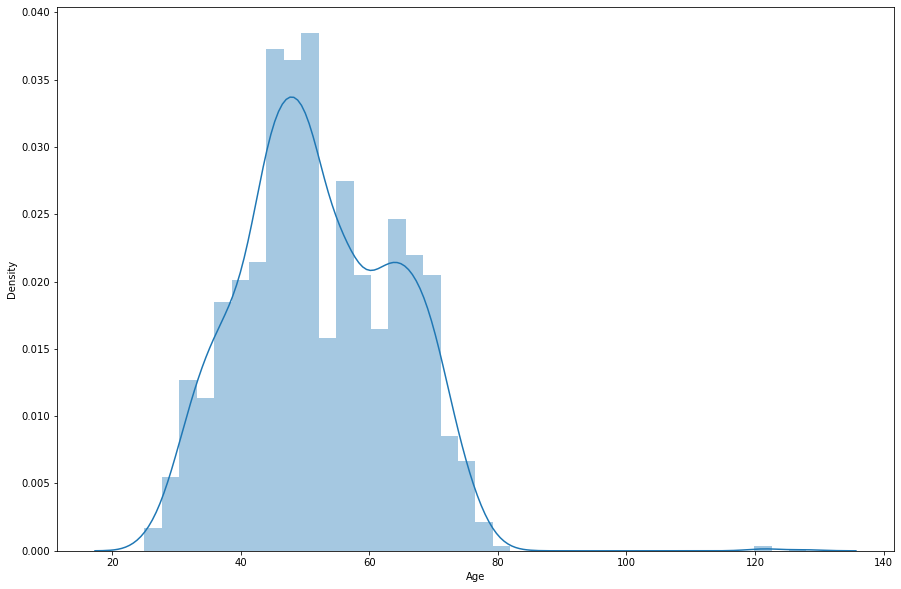

In [49]:
#visualisation de la distribution de nos données suivant les différentes variables
for col in col_qanti:
    plt.figure(figsize=(15,10))
    sns.distplot(df1_quanti[col])

    On Remarque que certaines variables étant de types quantitative possèdent 3 classes internes notament Kidhome et Teenhome, cela donne à reflexion sur un possible recodage au préalable avant la transmission du Dataset. Ces variables seront migrées dans le lot des variables qualitatives car elles sont qualitatives ordinales.
    
    Egalement, les variables reponse des précédentes campagnes AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5 ainsi que la variable Reponse possèse deux classes de reponses distincts 0 et 1 

     Suivant les différents  graphiques, on observe une distribution fortement étalée sur la droite pour la majorité des variables de types continue discrètes et une disproprotions des classes '0' et '1' au niveaux des variables AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5 et Reponse.
     
     L'ensemble des clients étant repartie entre approximativent 25 et 85 ans

###### Visualisation des outliers 

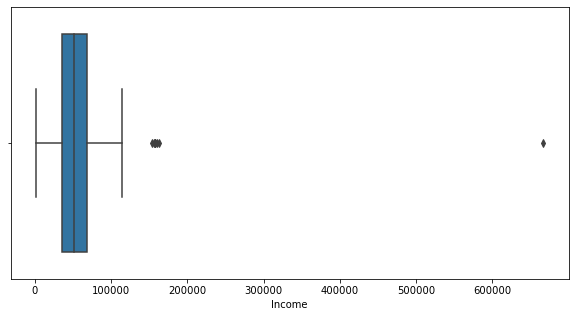

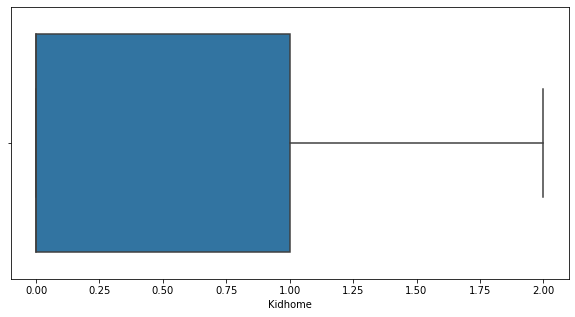

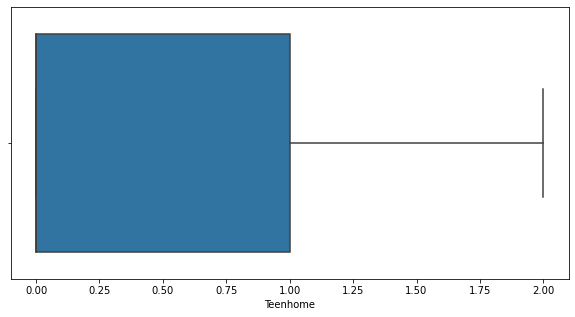

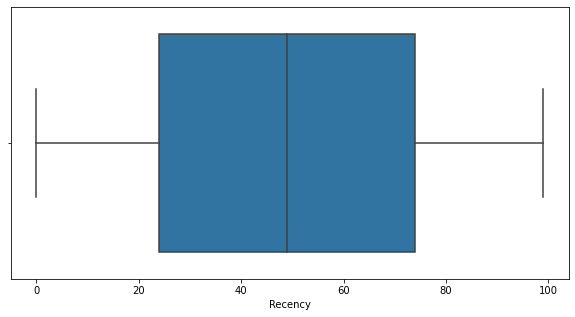

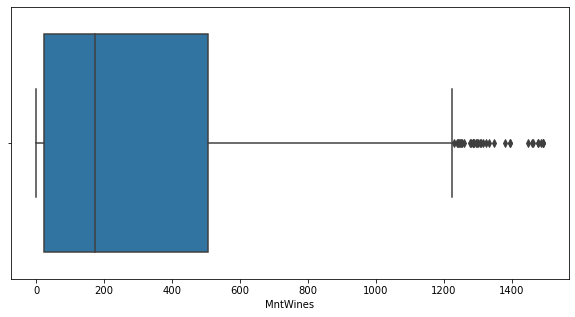

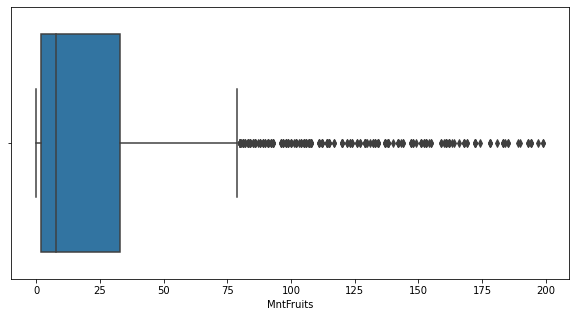

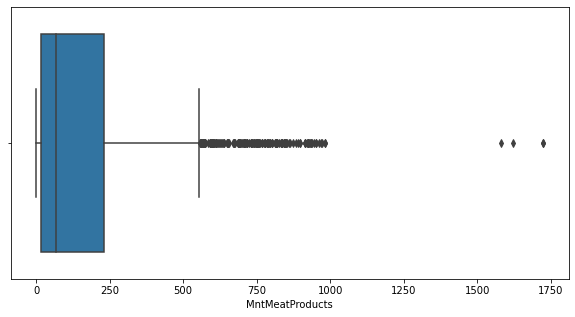

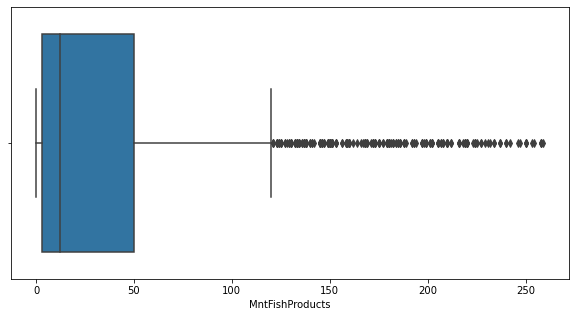

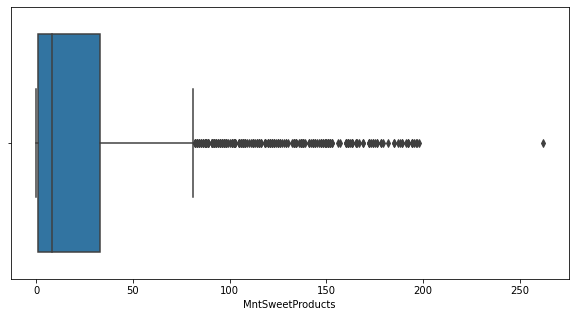

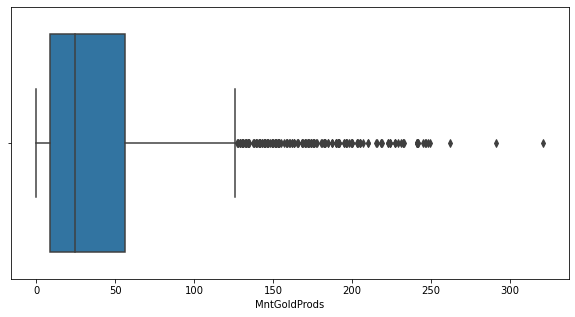

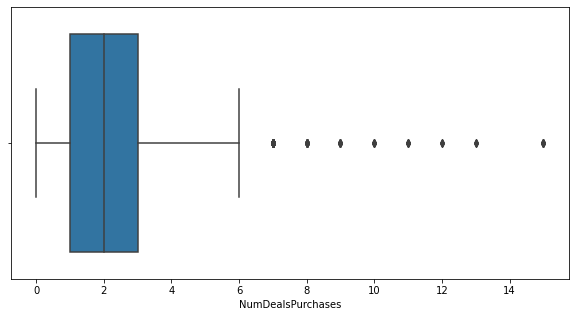

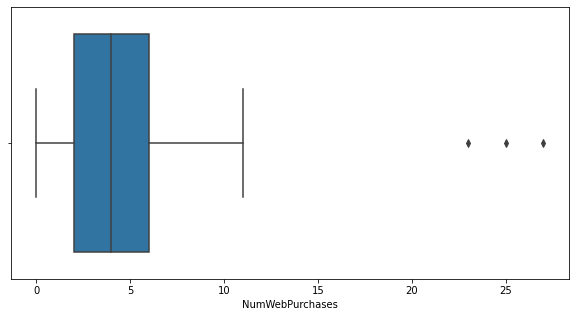

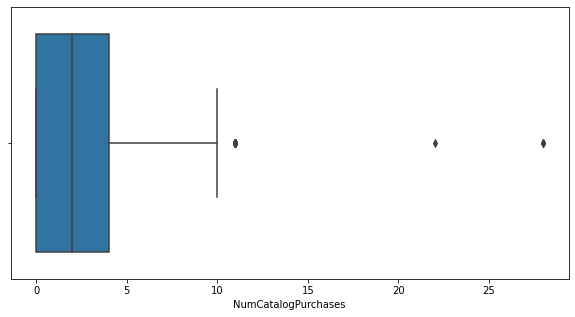

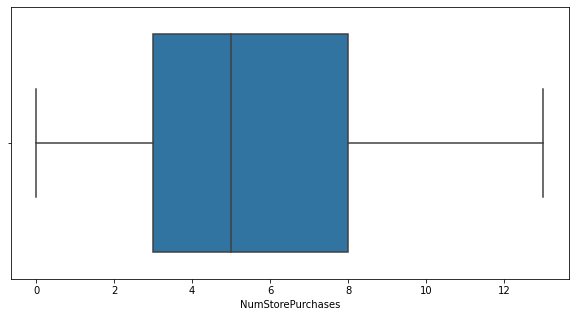

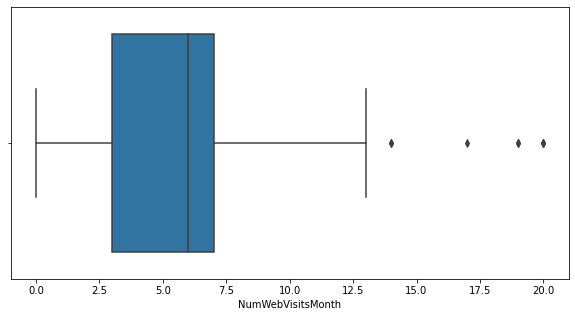

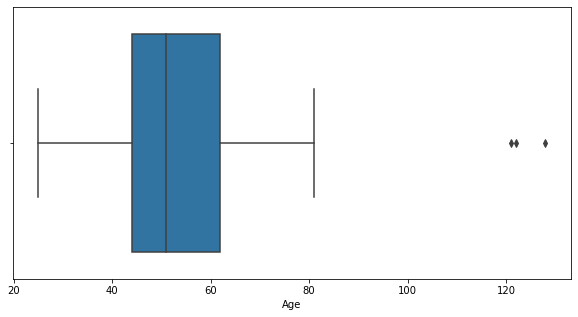

In [50]:
#les variables AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain et Reponse etant continu discrète, elles ne feront pas partie de cette visualisation car ayant un ensemble de reponse strictement sur deux valeurs: [0,1]

col_qanti2=['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age'] 
for col in col_qanti2:
    plt.figure(figsize=(10,5))
    sns.boxplot(df1_quanti[col]);

    On constate les variable 'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds'  ayant un fort taux d'outliers avec des distribution asymétrique au niveux de chaque variable.

##### Reconstitution des dataset de variables qantitative  et de variable qualitatives. 

In [57]:
#df1_quali=pd.get_dummies(df1_quali)
#df1_quali

In [59]:
df1_quali= df1[['Education', 'Marital_Status','Kidhome', 'Teenhome']]
df1_quali

,Education,Marital_Status,Kidhome,Teenhome
ID,,,,
5524,Graduation,Single,0,0
2174,Graduation,Single,1,1
4141,Graduation,Together,0,0
6182,Graduation,Together,1,0
5324,PhD,Married,1,0
...,...,...,...,...
10870,Graduation,Married,0,1
4001,PhD,Together,2,1
7270,Graduation,Divorced,0,0


In [60]:
df1_quanti=df1_quanti.drop(['Kidhome', 'Teenhome'], axis=1)
df1_quanti

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
ID,,,,,,,,,,,,,,,,,,,,,
5524,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,64
2174,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,67
4141,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,56
6182,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,37
5324,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,54
4001,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,75
7270,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,40


In [61]:
#fonction d'encodage des variables qualitatives encodEduc pour Education et encodMarital pour Situation matrimonial

def encodEduc(x):
    for i in range(len(x.values)):
        if x.values[i]=="Graduation":
            x.values[i]=0
        elif x.values[i]=="PhD":
            x.values[i]=1
        elif x.values[i]=="Master":
            x.values[i]=2
        elif x.values[i]=="2n Cycle ":
            x.values[i]=3
        elif x.values[i]=="Basic":
            x.values[i]=4
    return(x)


def encodMarital(x):
    for i in range(len(x.values)):
        if x.values[i]=="Married":
            x.values[i]=0
        elif x.values[i]=="Together":
            x.values[i]=1
        elif x.values[i]=="Single":
            x.values[i]=2
        elif x.values[i]=="Divorced":
            x.values[i]=3
        elif x.values[i]=="Widow":
            x.values[i]=4
        elif x.values[i]=="Alone":
            x.values[i]=5
        elif x.values[i]=="Basic":
            x.values[i]=6
        elif x.values[i]=="YOLO":
            x.values[i]=7
        elif x.values[i]=="Absurd":
            x.values[i]=8
    return(x)


In [63]:
#encodage de la variable Education
df1_quali['Education'] = encodEduc(df1_quali['Education'])

In [64]:
df1_quali

,Education,Marital_Status,Kidhome,Teenhome
ID,,,,
5524,0,Single,0,0
2174,0,Single,1,1
4141,0,Together,0,0
6182,0,Together,1,0
5324,1,Married,1,0
...,...,...,...,...
10870,0,Married,0,1
4001,1,Together,2,1
7270,0,Divorced,0,0


In [67]:
#encodage de la variable Marital_Status
df1_quali['Marital_Status'] = encodMarital(df1_quali['Marital_Status'])

In [68]:
df1_quali

,Education,Marital_Status,Kidhome,Teenhome
ID,,,,
5524,0,2,0,0
2174,0,2,1,1
4141,0,1,0,0
6182,0,1,1,0
5324,1,0,1,0
...,...,...,...,...
10870,0,0,0,1
4001,1,1,2,1
7270,0,3,0,0


In [69]:
df2= pd.concat([df1_quali, df1_quanti],axis = 1)

In [70]:
df2

,Education,Marital_Status,Kidhome,Teenhome,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
ID,,,,,,,,,,,,,,,,,,,,,,,,,
5524,0,2,0,0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,64
2174,0,2,1,1,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,67
4141,0,1,0,0,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,56
6182,0,1,1,0,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,37
5324,1,0,1,0,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,0,0,0,1,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,54
4001,1,1,2,1,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,75
7270,0,3,0,0,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,40


### Pre-processing

In [71]:
 df2.mean(axis=0)

Marital_Status             1.155235
Kidhome                    0.441787
Teenhome                   0.505415
Income                 52247.251354
Recency                   49.012635
MntWines                 305.091606
MntFruits                 26.356047
MntMeatProducts          166.995939
MntFishProducts           37.637635
MntSweetProducts          27.028881
MntGoldProds              43.965253
NumDealsPurchases          2.323556
NumWebPurchases            4.085289
NumCatalogPurchases        2.671029
NumStorePurchases          5.800993
NumWebVisitsMonth          5.319043
AcceptedCmp3               0.073556
AcceptedCmp4               0.074007
AcceptedCmp5               0.073105
AcceptedCmp1               0.064079
AcceptedCmp2               0.013538
Complain                   0.009477
Response                   0.150271
Age                       52.179603
dtype: float64

In [72]:
df2.std(axis=0)

Marital_Status             1.183902
Kidhome                    0.536896
Teenhome                   0.544181
Income                 25173.076661
Recency                   28.948352
MntWines                 337.327920
MntFruits                 39.793917
MntMeatProducts          224.283273
MntFishProducts           54.752082
MntSweetProducts          41.072046
MntGoldProds              51.815414
NumDealsPurchases          1.923716
NumWebPurchases            2.740951
NumCatalogPurchases        2.926734
NumStorePurchases          3.250785
NumWebVisitsMonth          2.425359
AcceptedCmp3               0.261106
AcceptedCmp4               0.261842
AcceptedCmp5               0.260367
AcceptedCmp1               0.244950
AcceptedCmp2               0.115588
Complain                   0.096907
Response                   0.357417
Age                       11.985554
dtype: float64

In [73]:
df3 = (df2 - df2.mean(axis=0))/df2.std(axis=0)
print(df3)

       AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
ID                                                                            
5524      -0.261602     -0.117122     -0.281709     -0.282641     -0.280776   
2174      -0.261602     -0.117122     -0.281709     -0.282641     -0.280776   
4141      -0.261602     -0.117122     -0.281709     -0.282641     -0.280776   
6182      -0.261602     -0.117122     -0.281709     -0.282641     -0.280776   
5324      -0.261602     -0.117122     -0.281709     -0.282641     -0.280776   
...             ...           ...           ...           ...           ...   
10870     -0.261602     -0.117122     -0.281709     -0.282641     -0.280776   
4001       3.820869     -0.117122     -0.281709     -0.282641     -0.280776   
7270      -0.261602     -0.117122     -0.281709      3.536460     -0.280776   
8235      -0.261602     -0.117122     -0.281709     -0.282641     -0.280776   
9405      -0.261602     -0.117122     -0.281709     

In [74]:
 df3.mean(axis=0)

AcceptedCmp1          -1.246997e-16
AcceptedCmp2          -3.616366e-16
AcceptedCmp3           3.200408e-16
AcceptedCmp4           2.509525e-16
AcceptedCmp5           2.671850e-16
Age                    9.168358e-17
Complain               3.927740e-16
Education                       NaN
Income                 4.139382e-17
Kidhome               -1.960926e-16
Marital_Status         3.917845e-16
MntFishProducts       -5.180373e-17
MntFruits              5.170353e-17
MntGoldProds          -4.574159e-17
MntMeatProducts       -4.058126e-17
MntSweetProducts      -3.221450e-17
MntWines              -4.293597e-17
NumCatalogPurchases   -7.354727e-17
NumDealsPurchases      1.992239e-16
NumStorePurchases      1.129762e-16
NumWebPurchases       -1.174101e-16
NumWebVisitsMonth     -1.094692e-16
Recency                1.390284e-17
Response              -7.074165e-17
Teenhome               8.815652e-16
dtype: float64

In [75]:
df3.std(axis=0)

AcceptedCmp1           1.0
AcceptedCmp2           1.0
AcceptedCmp3           1.0
AcceptedCmp4           1.0
AcceptedCmp5           1.0
Age                    1.0
Complain               1.0
Education              NaN
Income                 1.0
Kidhome                1.0
Marital_Status         1.0
MntFishProducts        1.0
MntFruits              1.0
MntGoldProds           1.0
MntMeatProducts        1.0
MntSweetProducts       1.0
MntWines               1.0
NumCatalogPurchases    1.0
NumDealsPurchases      1.0
NumStorePurchases      1.0
NumWebPurchases        1.0
NumWebVisitsMonth      1.0
Recency                1.0
Response               1.0
Teenhome               1.0
dtype: float64